In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
import tensorflow

In [6]:
tensorflow.__version__

'2.2.0'

In [9]:
#changing the current directory to the 'AV-Image Recognition' path
import os
os.chdir('/content/drive/My Drive/AV - Image Recognition/')
os.getcwd()

'/content/drive/My Drive/AV - Image Recognition'

In [51]:
#using cv2 read the first image that will be used for further processing
import cv2
image1 = cv2.imread('images/0.jpg')

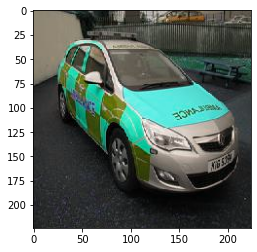

In [52]:
#display the image to see the details
import matplotlib.pyplot as plt
plt.imshow(image1)

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
model = tensorflow.keras.applications.vgg19.VGG19(weights='imagenet')

574717952/574710816 [==============================] - 5s 0us/step


In [17]:
#display the model summary
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
image2 = image1.reshape(1,224,224,3)

In [23]:
image2.shape

(1, 224, 224, 3)

In [25]:
predict_value = model.predict(image2)

In [33]:
import numpy as np
max_predict = np.argmax(predict_value)

In [34]:
max_predict

734

In [37]:
final = tensorflow.keras.applications.vgg19.decode_predictions(predict_value)

In [38]:
max_predict, final

(734,
 [[('n03977966', 'police_van', 0.3433649),
   ('n04037443', 'racer', 0.33061853),
   ('n04285008', 'sports_car', 0.09424856),
   ('n02930766', 'cab', 0.04765115),
   ('n02701002', 'ambulance', 0.033160295)]])

In [55]:
#adding occulsion to check whether the intended features are considered 
#during the prediction process rather than random values.
image1[100:200, 100:250, :] = 0

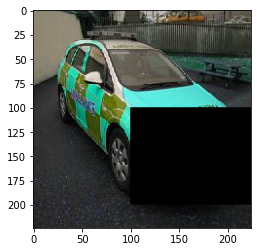

In [56]:
plt.imshow(image1)

In [57]:
image3 = image1.reshape(1,224,224,3)

In [58]:
predict_value = model.predict(image3)

In [63]:
predict_value[0][max_predict]

0.09432125

In [64]:
#after occlusion of the front portion of the car, the prediction
#probability has changed implying these features play an important role in 
#object classification.

In [65]:
tensorflow.keras.applications.vgg19.decode_predictions(predict_value)

[[('n04037443', 'racer', 0.33097228),
  ('n03977966', 'police_van', 0.09432125),
  ('n04285008', 'sports_car', 0.092359744),
  ('n03930630', 'pickup', 0.06489721),
  ('n02930766', 'cab', 0.05526715)]]

In [66]:
#The prediction has changed to racer rather than police_van